# Random Forest Classifier

In [24]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Hyperparameter Tuning

### Hyperparameters to be tuned
1. ```n_estimators```
        - The number of trees in the forest
2. ```criterion```
        - The function to measure the quality of a split
3. ```max_depth```
        - The maximum depth of the tree
4. ```bootstrap```
        - Whether bootstrap samples are used when building trees
5. ```max_samples```
        - The number of samples to draw from X to train each base estimator if bootstrap is ```True```

In [11]:
estimators_scores_list = []
for i in range(1, 100):
    model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    estimators_scores_list.append(accuracy_score(y_test, y_pred))

In [ ]:
px.line(
    x=range(1, len(estimators_scores_list) + 1),
    y=estimators_scores_list,
    labels={'x': 'No. estimators', 'y': 'Testing accuracy'},
    title='The accuracy score of the Random Forest Classifier as the no. estimators is varied')

In [12]:
max_depth_scores_list = []
for i in range(1, 20):
    model = RandomForestClassifier(n_estimators=20, max_depth=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    max_depth_scores_list.append(accuracy_score(y_test, y_pred))

In [13]:
px.line(
    x=range(1, len(max_depth_scores_list) + 1),
    y=max_depth_scores_list,
    labels={'x': 'Maximum depth', 'y': 'Testing accuracy'},
    title='The accuracy score of the Random Forest Classifier as the maximum depth is varied')

In [15]:
max_samples_scores_list = []
for i in range(1, 10):
    model = RandomForestClassifier(n_estimators=20, max_depth=5, bootstrap=True, max_samples=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    max_samples_scores_list.append(accuracy_score(y_test, y_pred))

In [17]:
px.line(
    x=range(1, len(max_samples_scores_list) + 1),
    y=max_samples_scores_list,
    labels={'x': 'Maximum depth', 'y': 'Testing accuracy'},
    title='The accuracy score of the Random Forest Classifier with bagging as the maximum samples is varied')

### Without bagging

In [23]:
n_estimators = list(range(10, 41))
criterion = ['gini', 'log_loss']
max_depth = list(range(4, 13))
hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth)

decision_tree = RandomForestClassifier(random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best n_estimators: 38
Best criterion: gini
Best max_depth: 10


In [4]:
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=38,
    max_depth=10,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.4929302981299498
Best Precision: 0.4097618896566619
Best Recall: 0.3869283401231103
Best F1: 0.3214784037527122


### With bagging

In [9]:
n_estimators = list(range(10, 41))
criterion = ['gini', 'log_loss']
max_depth = list(range(4, 13))
max_samples = list(range(1, 5))
hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    max_samples=max_samples)

decision_tree = RandomForestClassifier(bootstrap=True, random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best max_samples:', best_model.best_estimator_.get_params()['max_samples'])

Best n_estimators: 40
Best criterion: gini
Best max_depth: 4
Best max_samples: 3


In [5]:
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=40,
    max_depth=4,
    bootstrap=True,
    max_samples=3,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.4620392254426338
Best Precision: 0.25136492244614433
Best Recall: 0.33831947087265785
Best F1: 0.24416414577144074


## Most accurate model

In [22]:
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=38,
    max_depth=10,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.4929302981299498
Best Precision: 0.4097618896566619
Best Recall: 0.3869283401231103
Best F1: 0.3214784037527122


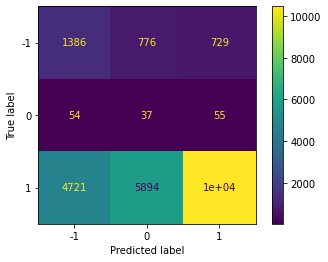

In [49]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()

In [48]:
random_forest_importance_bar = px.bar(
    y=model.feature_names_in_,
    x=model.feature_importances_,
    color=model.feature_importances_,
    labels={'x': 'Importance', 'y':'Feature', 'color': 'Importance'},
    title='Visualising important features')
random_forest_importance_bar.write_image('../README-images/random-forest-importance.png')
random_forest_importance_bar